In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams['text.usetex'] = True
from IPython.display import display, Math

# Oscilador Armónico Amortiguado

El **oscilador armónico amortiguado** es un sistema físico que describe el movimiento de una partícula o cuerpo sometido a una fuerza restauradora proporcional al desplazamiento (como en un resorte) y a una fuerza de **amortiguamiento** (resistencia) proporcional a la velocidad.

## Ecuación de movimiento

La ecuación diferencial que lo gobierna es:

$$
m \ddot{x} + b \dot{x} + kx = 0
$$

donde:

* (m) = masa del oscilador
* (b) = coeficiente de amortiguamiento (resistencia viscosa)
* (k) = constante del resorte $k= mg/x_m$
* (x(t)) = desplazamiento en función del tiempo



## Frecuencias características

Se define la **frecuencia natural sin amortiguamiento**:

$$
\omega_0 = \sqrt{\frac{k}{m}}$$

y la **constante de amortiguamiento reducido**:

$$
\gamma = \frac{b}{2m}
$$

## Tipos de régimen

El comportamiento depende de la relación entre $\gamma$ y $\omega_0$:

1. **Subamortiguado** ($\gamma < \omega_0$)
   El sistema oscila con frecuencia reducida:
   $$
   \omega_d = \sqrt{\omega_0^2 - \gamma^2}
   $$
   Solución:
   $$
   x(t) = A e^{-\gamma t} \cos(\omega_d t + \phi)
   $$
   
   $$  
    \dot{x}(t) = -A e^{-\gamma t} \left[ \gamma \cos\left( \omega_d t + \phi \right) + \omega_d \sin\left( \omega_d t + \phi \right) \right]
   $$
   

2. **Amortiguamiento crítico** ($(\gamma = \omega_0)$)
   No hay oscilaciones, el sistema regresa a equilibrio lo más rápido posible sin oscilar:
   $$
   x(t) = (C_1 + C_2 t) e^{-\gamma t}
   $$

3. **Sobreamortiguado** ($\gamma > \omega_0$)
   El sistema no oscila, regresa lentamente al equilibrio:
   $$
   x(t) = C_1 e^{(-\gamma + \sqrt{\gamma^2 - \omega_0^2})t} + C_2 e^{(-\gamma - \sqrt{\gamma^2 - \omega_0^2})t}
   $$


In [9]:
df = pd.read_csv("../Data/oscilador_amortiguado_data.csv")

# Ver las primeras filas
df.head()

tiempo = df["tiempo"].values 
posicional = df["posicion"].values
velocidad_d = df["velocidad"].values

## Envolvente del oscilador armónico amortiguado
La envolvente está dada por:
$$
x_{\text{env}}(t) = \pm A e^{-\gamma t}
$$

In [10]:
# x_env 
def x_max(t, A0, gamma):
    """
    Calcula la amplitud máxima x_max de un oscilador armónico subamortiguado.
    
    Parámetros:
    t  : tiempo (float o array)
    A0 : amplitud inicial
    m  : masa
    b  : coeficiente de amortiguamien
    
    Retorna:
    x_max : amplitud máxima en el tiempo t
    """
    return A0 * np.exp(-gamma * (t))

# Trayectoria
def x(t, A0, gamma, omega_d, phi):
    return A0 * np.exp(-gamma * (t)) * np.cos(omega_d * t + phi)
# Velocidad 
def v(t, A0, gamma, omega_d, phi):
    return -A0 * gamma * np.exp(-gamma * t) * np.cos(omega_d * t + phi) - A0 * omega_d * np.exp(-gamma * t) * np.sin(omega_d * t + phi)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


m =  138.1
k =  42336.28125
omega_0 =  17.50892629489313
gamma =  1.179
A =  3.142
phi =  0
omega_d= 17.469185985614786


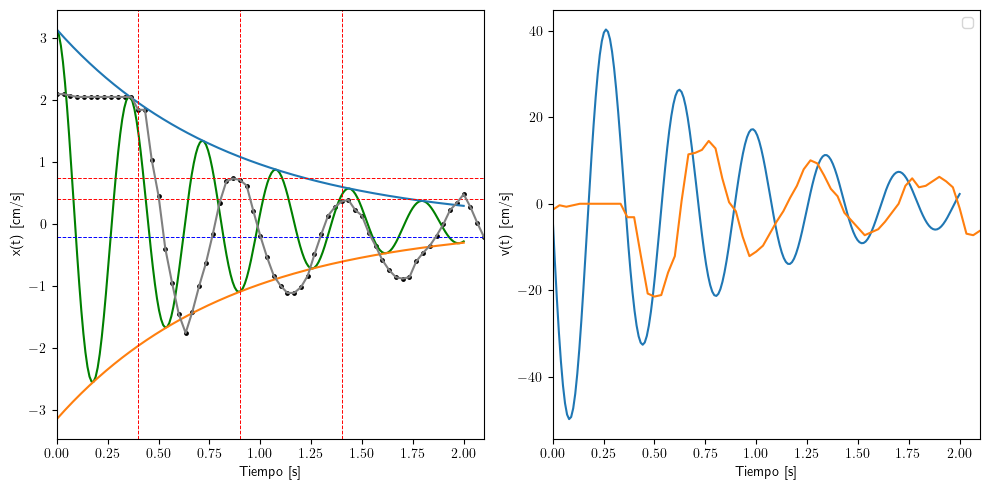

In [17]:
# Parámetros
m = 68.8+69.3   # masa gr 
print('m = ', m) #
k = (m*981)/3.2  # constante del resorte
print('k = ', k)
omega0 = np.sqrt(k/m)
print('omega_0 = ', omega0)
gamma = 1.179   # coeficiente de amortiguamiento # gamma = b / (2*m) (obtenemos gamma usando la relacion X_env)
print('gamma = ', gamma)
A0 = 3.142   # amplitud inicial cm
print('A = ', A0)
phi =  0 #1.444  # fase inicial
print('phi = ', phi)

# Parámetros derivados
omega_d = np.sqrt(omega0**2 - gamma**2)  # frecuencia amortiguada
print('omega_d=', omega_d)

# Rango de tiempo
t_fit = np.linspace(0, 2, 200)

posicion = x(t_fit, A0, gamma, omega_d, phi)
velocidad = v(t_fit, A0, gamma, omega_d, phi)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex=True)

ax1.plot(t_fit, posicion, c = 'green')
ax1.set_ylabel('x(t) [cm/s]')
ax1.set_xlabel('Tiempo [s]')
ax1.set_xlim(0,2.1)

ax2.plot(t_fit, velocidad)
ax2.set_ylabel('v(t) [cm/s]')
ax2.set_xlabel('Tiempo [s]')
ax2.plot(tiempo, velocidad_d)

ax1.plot(t_fit, x_max(t_fit, A0, gamma))
ax1.plot(t_fit, -x_max(t_fit, A0, gamma))
ax1.axhline(y=0.75, color='red', linestyle='--', lw = 0.7)
ax1.axhline(y=0.4, color='red', linestyle='--', lw = 0.7)
ax1.axhline(y=-0.2, color='blue', linestyle='--', lw = 0.7)

ax1.axvline(x=1.4, color='red', linestyle='--', lw = 0.7)
ax1.axvline(x=0.4, color='red', linestyle='--', lw = 0.7)
ax1.axvline(x=0.9, color='red', linestyle='--', lw = 0.7)
ax1.scatter(tiempo, posicional, s = 6, c = 'black')
ax1.plot(tiempo, posicional, c = 'grey')

ax1.grid(False)
plt.tight_layout()

plt.legend()

plt.show()

# Debemos encortrar la curva que mejor ajuste a los datos

In [13]:
from scipy.optimize import curve_fit

A0 ajustado: 3.142
gamma ajustado: 1.179
omega_d ajustado: 17.469
phi ajustado: 1.444


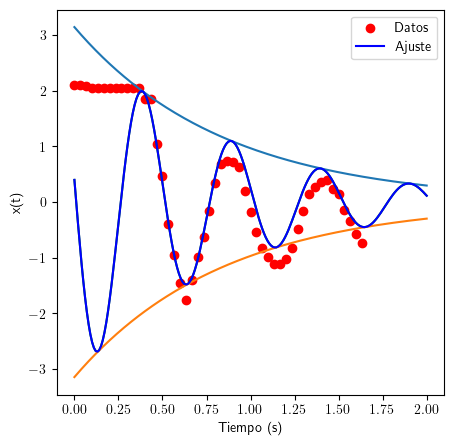

In [14]:
def x_t(t, A0, gamma, omega_d, phi):
    return  A0 * np.exp(-gamma * (t)) * np.cos(omega_d * (t) + phi)

# Ajuste usando curve_fit (Usamos solo los datos del 14 al 50)
popt, pcov = curve_fit(x_t, tiempo[14:50], posicional[14:50], p0 = [A0, gamma, omega_d, phi] )
A0_fit, gamma_fit, omega_d_fit, phi_fit = popt

print(f"A0 ajustado: {A0_fit:.3f}")
print(f"gamma ajustado: {gamma_fit:.3f}")
print(f"omega_d ajustado: {omega_d:.3f}")
print(f"phi ajustado: {phi_fit:.3f}")

t_fit = np.linspace(0, 2, 200)

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(5,5), sharex=True)

plt.scatter(tiempo[0:50], posicional[0:50], color='red', label='Datos')
plt.plot(t_fit, x(t_fit, *popt), c = 'green')
plt.plot(t_fit, x_max(t_fit, A0_fit, gamma_fit))
plt.plot(t_fit, -x_max(t_fit, A0_fit, gamma_fit))
plt.plot(t_fit, x_t(t_fit, *popt), label='Ajuste', color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("x(t)")
plt.legend()
plt.show()


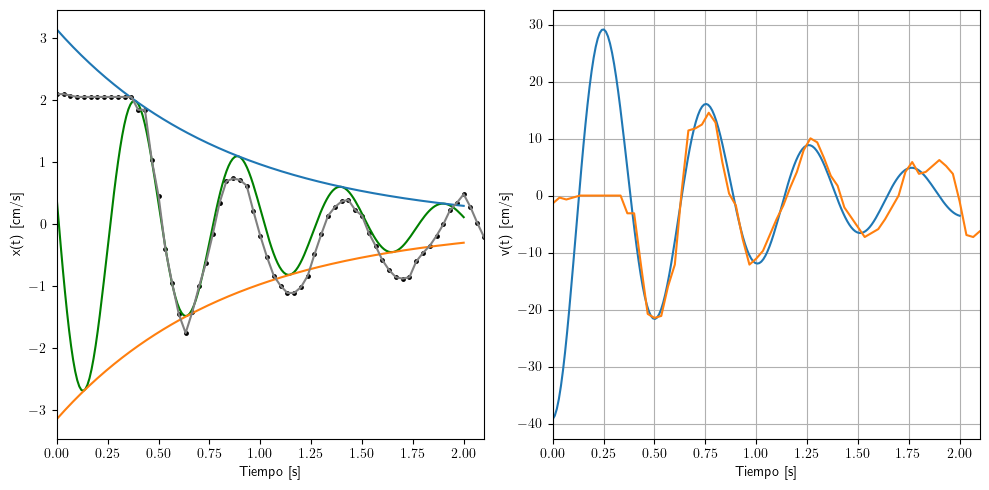

In [15]:
# Grafiquemos una vez más los puntos contra la curva teorica

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharex=True)

ax1.plot(t_fit, x(t_fit, *popt), c = 'green')
ax1.set_ylabel('x(t) [cm/s]')
ax1.set_xlabel('Tiempo [s]')
ax1.set_xlim(0,2.1)
ax2.plot(t_fit, v(t_fit, *popt))
ax2.set_ylabel('v(t) [cm/s]')
ax2.set_xlabel('Tiempo [s]')
ax2.plot(tiempo, velocidad_d)
ax1.plot(t_fit, x_max(t_fit, A0_fit, gamma))
ax1.plot(t_fit, -x_max(t_fit, A0_fit, gamma))

ax1.scatter(tiempo, posicional, s = 6, c = 'black')
ax1.plot(tiempo, posicional, c = 'grey')
ax2.grid(True)
plt.tight_layout()

plt.show()

## Energía

Para el sistema sub-amortiguado: La energía total disminuye con el tiempo debido al trabajo de la fuerza de fricción:

$$
E(t) = \frac{1}{2} m \dot{x}^2 + \frac{1}{2} k x^2 \quad \propto \quad e^{-2\gamma t}
$$

--

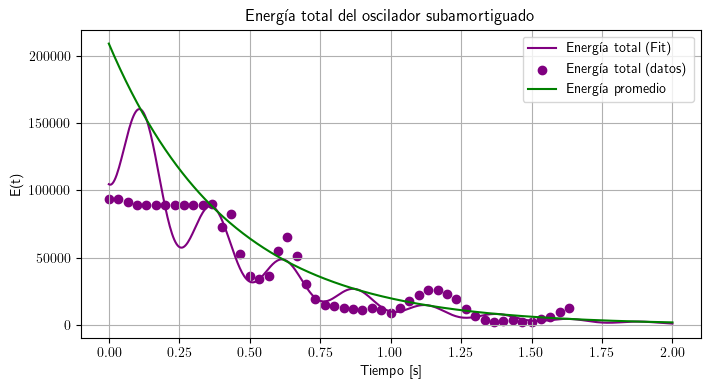

In [16]:
# Energia dependiente del tiempo
def E(t, A, gamma,omega_d, phi):
    x = A * np.exp(-gamma*t) * np.cos(omega_d*t - phi)
    v = -A * np.exp(-gamma*t) * (gamma*np.cos(omega_d*t - phi) + omega_d*np.sin(omega_d*t - phi))
    return 0.5*m*v**2 + 0.5*k*x**2

# Energia promedio 
def E_promedio(t, k, A, gamma):
    E0 = 0.5 * k * A**2
    return E0 * np.exp(-2 * gamma * t)


# --- Tiempo ---
t = np.linspace(0, 2, 500)

# --- Graficar ---
plt.figure(figsize=(8,4))
plt.plot(t, E(t, A0_fit, gamma_fit, omega_d_fit, phi_fit), color='purple', label='Energía total (Fit)')
plt.scatter(tiempo[0:50], 0.5*m*velocidad_d[0:50]**2 + 0.5*k*posicional[0:50]**2, color='purple', label='Energía total (datos)')
plt.plot(t, E_promedio(t, k, A0_fit, gamma_fit), color='green', label='Energía promedio')
plt.xlabel('Tiempo [s]')
plt.ylabel('E(t)')
plt.title('Energía total del oscilador subamortiguado')
plt.grid(True)
plt.legend()
plt.show()